In [323]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
from math import sqrt
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/sultanahaldawsari/Desktop/Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Understanding and Exploring

In [3]:
df.shape
#We have 768 observations and 9 features

(768, 9)

In [4]:
df.info()
#our features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.Outcome.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.Outcome.value_counts()
#This shows imbalance target because we have 1 as minority class and it's what we want to predict

0    500
1    268
Name: Outcome, dtype: int64

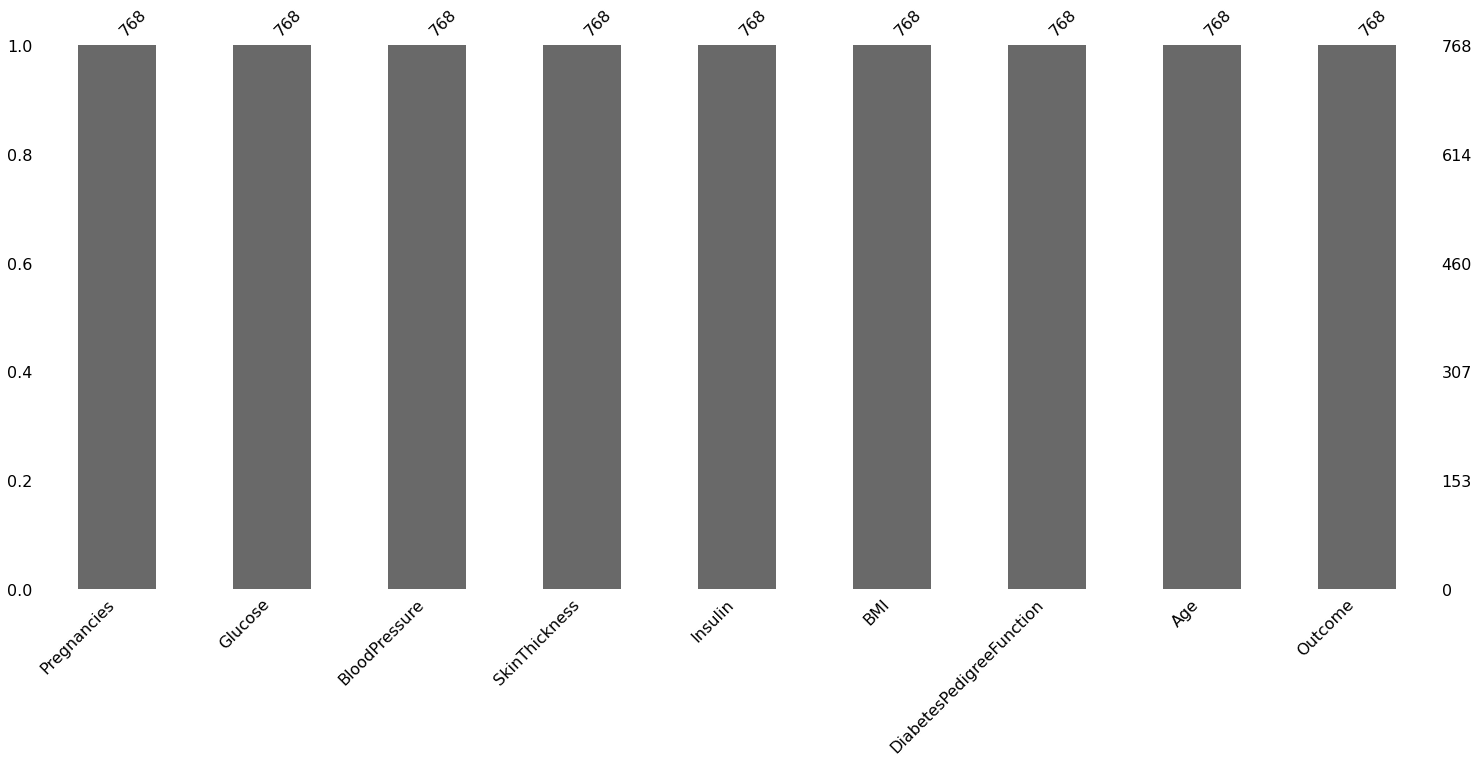

In [10]:
#We don't have null data
p=msno.bar(df)

# Visualization 

## Target

<AxesSubplot:xlabel='Outcome', ylabel='count'>

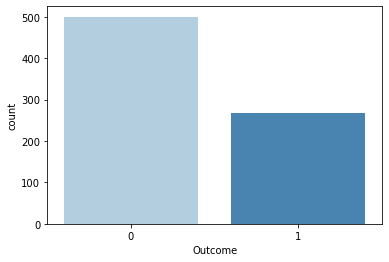

In [11]:
sns.countplot(x='Outcome',data=df, palette = 'Blues')

## Features

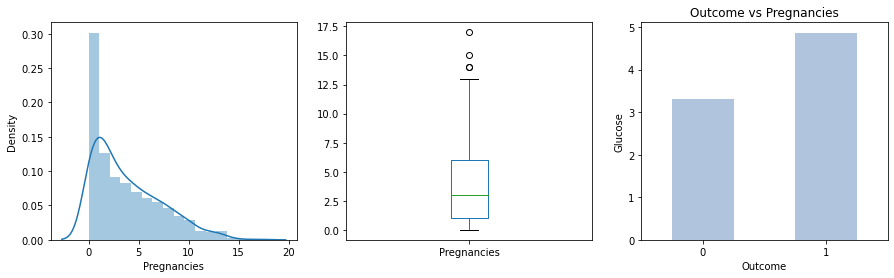

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Pregnancies'])
plt.subplot(1,3,2)
df['Pregnancies'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['Pregnancies'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs Pregnancies', xlabel='Outcome', ylabel='Glucose')
plt.xticks(rotation=0);
plt.show();

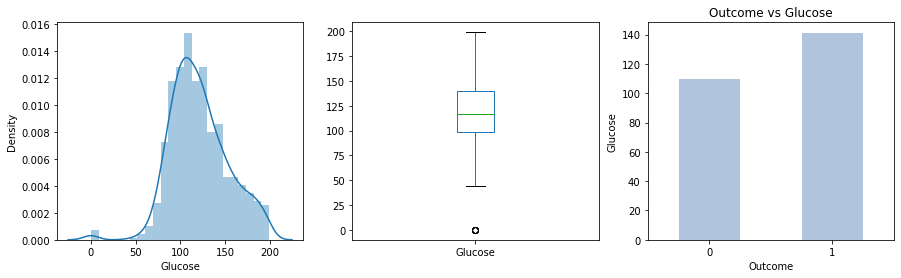

In [13]:
#We can derive from the plots that glucose increase the chance of someone getting a diabetes 
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Glucose'])
plt.subplot(1,3,2)
df['Glucose'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['Glucose'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs Glucose', xlabel='Outcome', ylabel='Glucose')
plt.xticks(rotation=0);
plt.show();

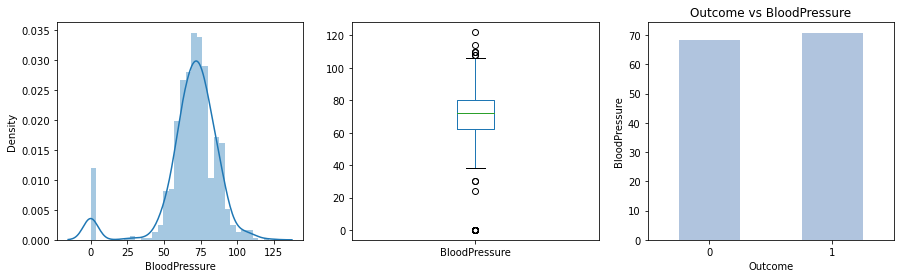

In [14]:
#Bloodpressure doesn't really have an affect on the outcome
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['BloodPressure'])
plt.subplot(1,3,2)
df['BloodPressure'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['BloodPressure'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs BloodPressure', xlabel='Outcome', ylabel='BloodPressure')
plt.xticks(rotation=0);
plt.show();

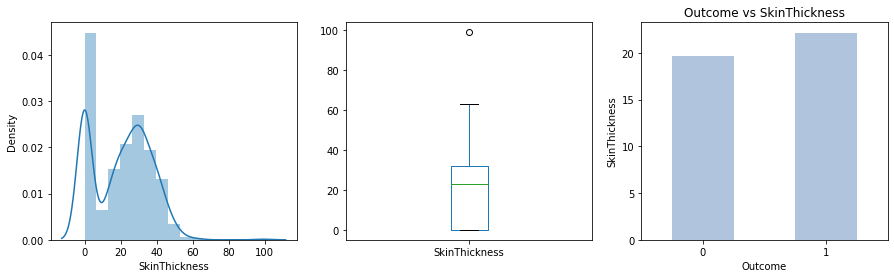

In [15]:
#Based on the skin thickness it doesn't have a significant difference on the outcome.
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['SkinThickness'])
plt.subplot(1,3,2)
df['SkinThickness'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['SkinThickness'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs SkinThickness', xlabel='Outcome', ylabel='SkinThickness')
plt.xticks(rotation=0);
plt.show();

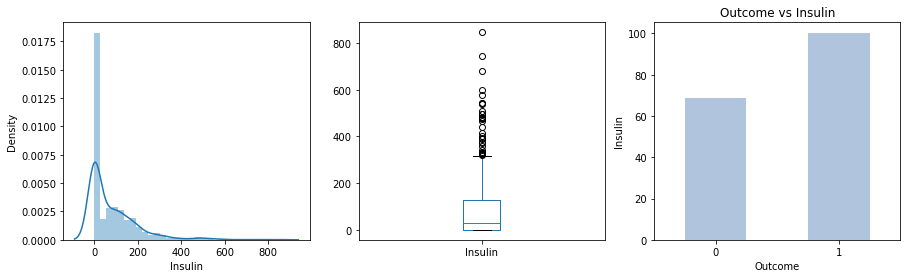

In [16]:
#We can derive that insulin have an impact on the outcome
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Insulin'])
plt.subplot(1,3,2)
df['Insulin'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['Insulin'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs Insulin', xlabel='Outcome', ylabel='Insulin')
plt.xticks(rotation=0);
plt.show();

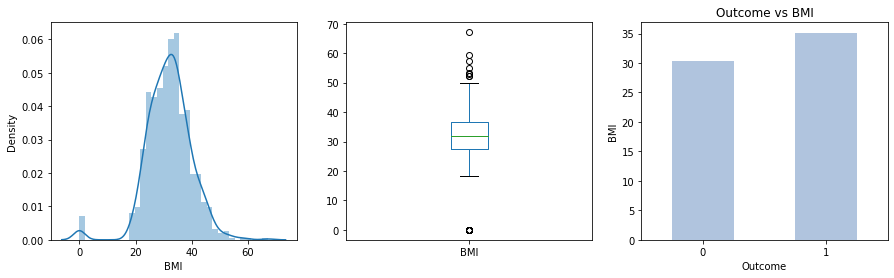

In [17]:
#BMI have an impact on the outcome
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['BMI'])
plt.subplot(1,3,2)
df['BMI'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['BMI'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs BMI', xlabel='Outcome', ylabel='BMI')
plt.xticks(rotation=0);
plt.show();

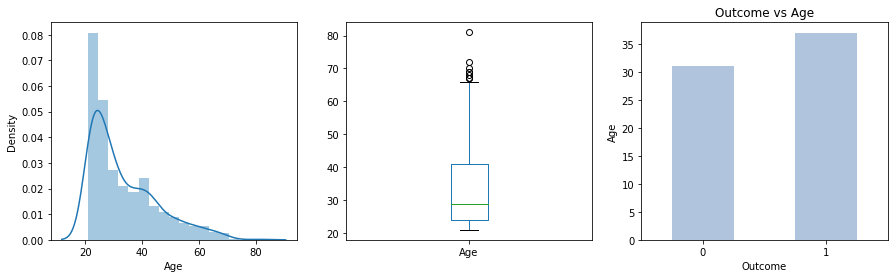

In [18]:
#Age have an impact on the outcome
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.subplot(1,3,2)
df['Age'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['Age'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs Age', xlabel='Outcome', ylabel='Age')
plt.xticks(rotation=0);
plt.show();

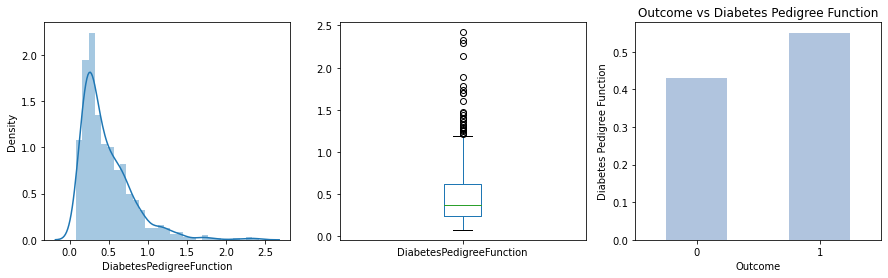

In [19]:
#Diabetes Pedigree Function have an impact on the outcome
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(1,3,2)
df['DiabetesPedigreeFunction'].plot.box()
plt.subplot(1,3,3)
OxG = df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()
OxG.plot(kind='bar', color ='lightsteelblue', title='Outcome vs Diabetes Pedigree Function', xlabel='Outcome', ylabel='Diabetes Pedigree Function')
plt.xticks(rotation=0);
plt.show();

## Correlations between target and features 

<AxesSubplot:>

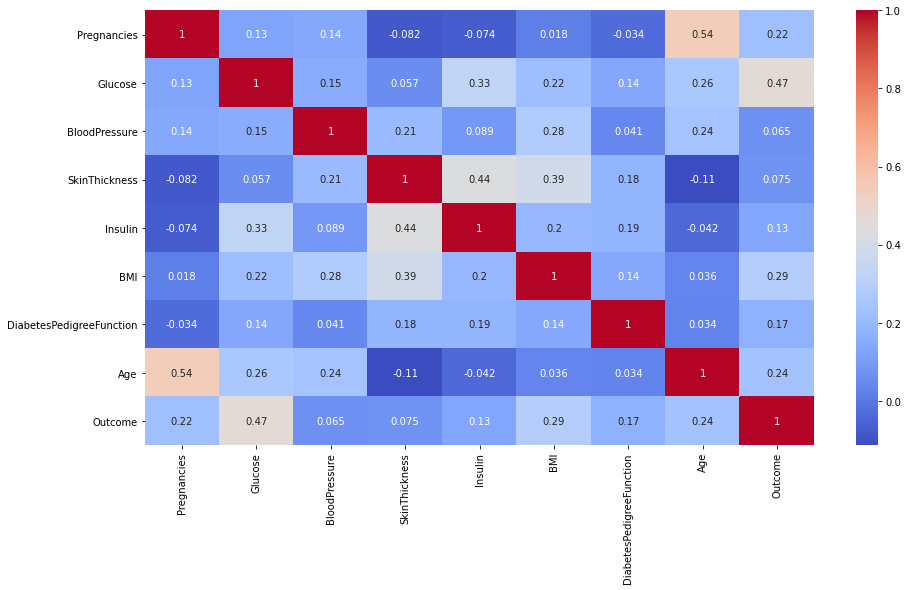

In [20]:
#Understand and find correlation between the target and the features
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

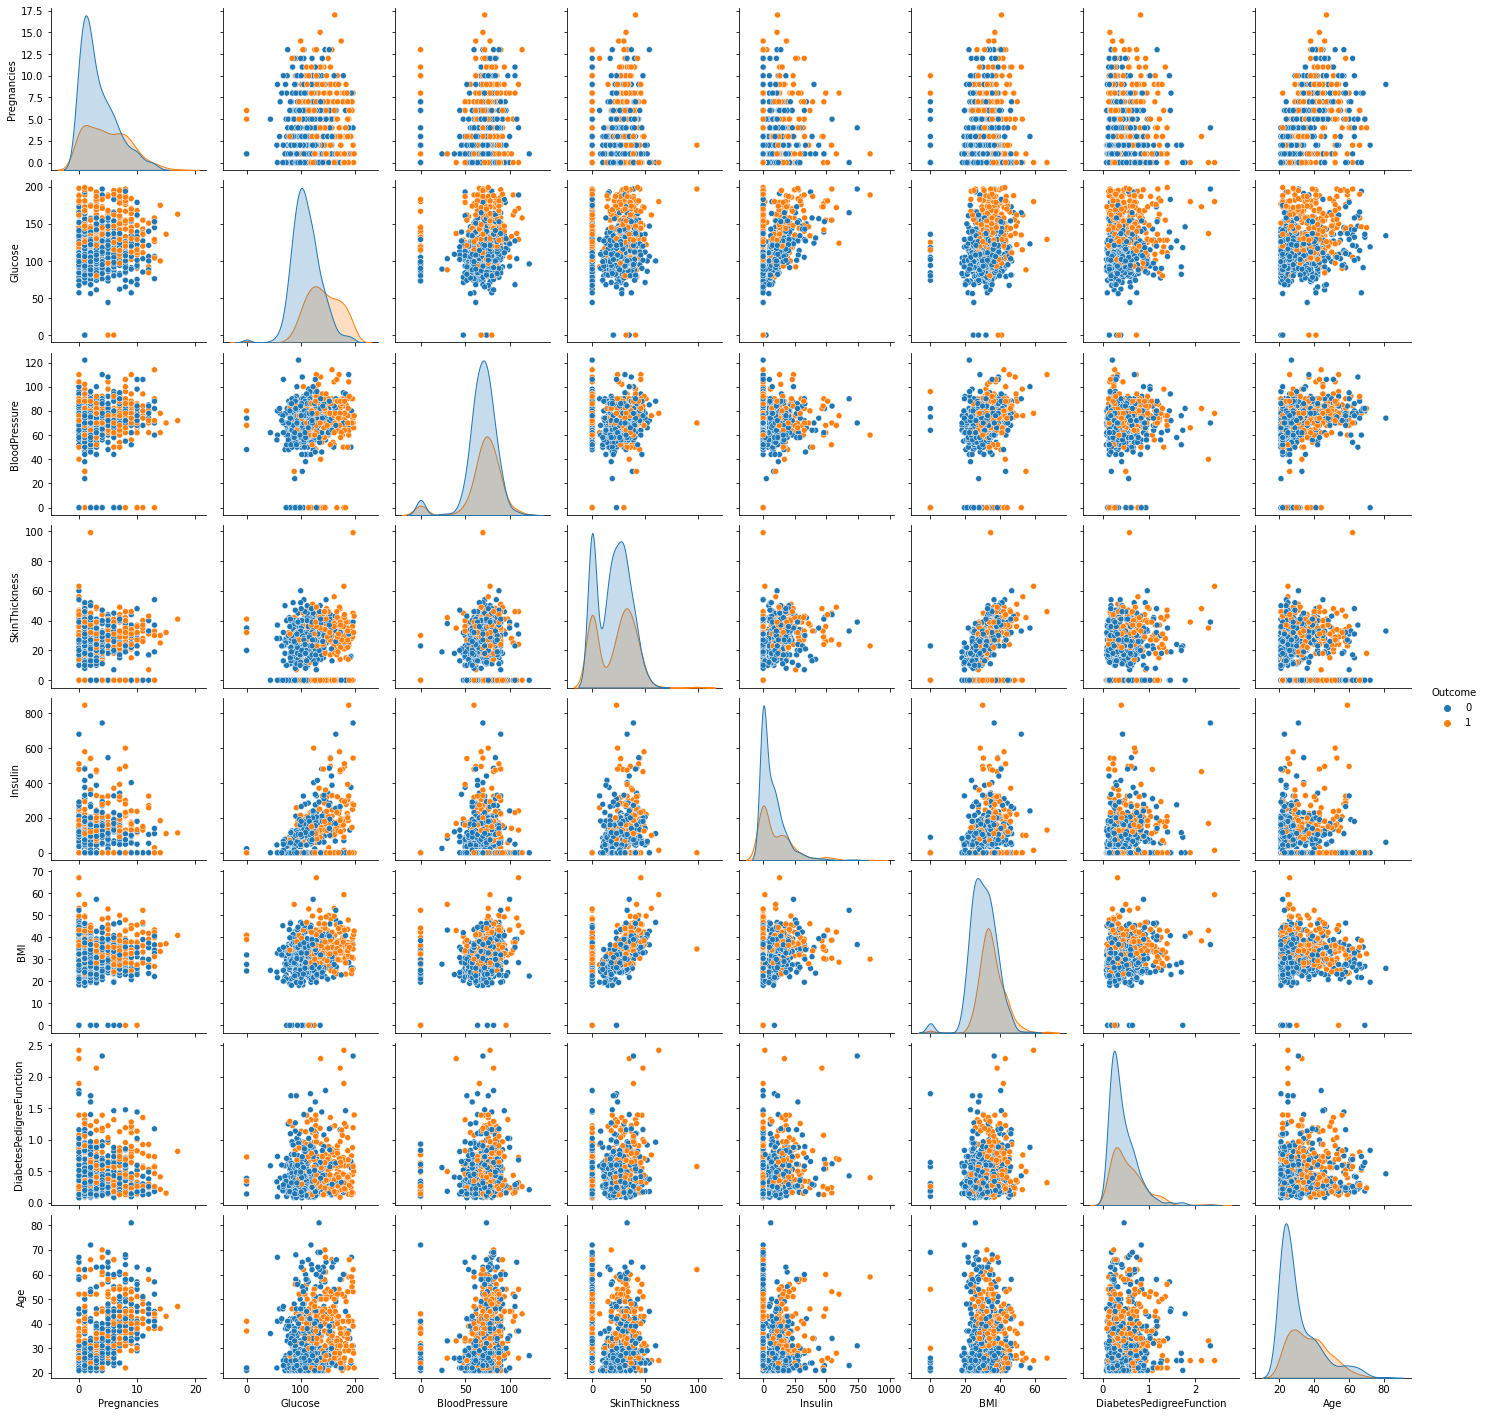

In [21]:
sns.pairplot(df, hue = 'Outcome')

# Data Preparing

In [30]:
diabetes = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [31]:
diabetes.shape

(768, 8)

## Outlier Handling

In [32]:
#The Local Outlier Factor (LOF) computes the local density deviation of a given data point with respect to its neighbors.
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [33]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30457052, -2.48890799, -2.2877884 , -2.10558603, -2.05374656,
       -2.03014321, -2.01100584, -2.00738455, -1.98658695, -1.95341289,
       -1.9160274 , -1.88847454, -1.8135264 , -1.80934664, -1.74199323,
       -1.7317631 , -1.7164913 , -1.71405855, -1.67460313, -1.63962725,
       -1.6354469 , -1.62239927, -1.61162079, -1.59447149, -1.54695917,
       -1.5431884 , -1.51416332, -1.49970019, -1.49624949, -1.48958966])

In [34]:
threshold = np.sort(df_scores)[7]
threshold

-2.0073845498927367

In [35]:
outlier = df_scores > threshold
diabetes= diabetes[outlier]

In [36]:
diabetes.shape

(760, 8)

## Handling Zeros

In [37]:
#This displays how many zeros we have in each feature
print("Total number of rows: {0}", format(len(diabetes)))
print("Number of rows missing Pregnancies: {0}",
      format(len(diabetes.loc[diabetes['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(diabetes.loc[diabetes['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(diabetes.loc[diabetes['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(diabetes.loc[diabetes['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(diabetes.loc[diabetes['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(diabetes.loc[diabetes['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(diabetes.loc[diabetes['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(diabetes.loc[diabetes['Age']==0])))

Total number of rows: {0} 760
Number of rows missing Pregnancies: {0} 109
Number of rows missing Glucose: {0} 3
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 226
Number of rows missing Insulin: {0} 369
Number of rows missing BMI: {0} 10
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [38]:
#We iterate thorugh each column in the dataframe and fill zeros with mean
for col in diabetes.columns:
    val = diabetes[col].mean()
    diabetes[col] = diabetes[col].replace(0, val)

In [39]:
diabetes[diabetes.columns].isin({0}).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [40]:
#We concatenate Outcome column with diabetes dataframe 
diabetes['Outcome'] = df['Outcome']

In [41]:
diabetes.shape

(760, 9)

In [42]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,77.652632,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,77.652632,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.394737,77.652632,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.872368,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Split into Train and Test

In [43]:
y = diabetes.pop('Outcome')
X = diabetes

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [45]:
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape, "| y_test shape:", y_test.shape)

X_train shape: (532, 8) | X_test shape: (228, 8)
y_train shape: (532,) | y_test shape: (228,)


## Scale Data

In [46]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Building and Evaluation

In [257]:
results = pd.DataFrame(columns=['Algorithm Used' ,'Accuracy','Recall','Precision','F1-Score','AUC'])
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC


## K-Nearest Neighbours 

#### KNN Classifying before Tuning and GridsearchCV

In [258]:
knn = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [259]:
result1 = {'Algorithm Used':'K-Nearest Neighbours', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result1, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725,0.70303,0.764253


#### KNN Classifying after Tuning and using GridsearchCV

In [51]:
#Used GridSearch to find the best parameter
parameters = {"n_neighbors": range(1, 50),'weights': ('uniform', 'distance'),'metric':('manhattan','euclidean','minkowski')}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 24, 'weights': 'distance'}

In [260]:
knn = KNeighborsClassifier(n_neighbors=24,p=2,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [261]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.789474
recall,0.635294
precision,0.760563
roc_auc_score,0.692308
f1_score,0.758206


In [262]:
result2 = {'Algorithm Used':'K-Nearest Neighbours Tuned ', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result2, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206


In [263]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.45883146774112354

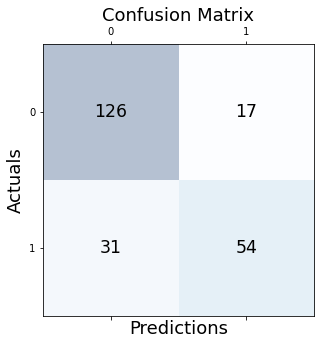

In [264]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

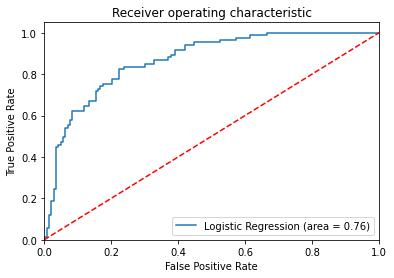

In [58]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

#### Logistic Regression before tuning and using GridSeachCV 

In [265]:
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [266]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.815789
recall,0.694118
precision,0.786667
roc_auc_score,0.737500
f1_score,0.791115


In [267]:
lr = LogisticRegression(C=5,solver='saga')
lr.fit(X_train, y_train)
THRESHOLD = 0.45
y_pred = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [268]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.824561
recall,0.752941
precision,0.771084
roc_auc_score,0.761905
f1_score,0.810037


In [269]:
result3 = {'Algorithm Used':'Logistic Regression ', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result3, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037


#### Logistic Regression after tuning and using GridSeachCV 

In [71]:
grid={"C":range(1,10), "penalty":["l1","l2"], "solver":['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}# l1 lasso l2 ridge
gridsearch=GridSearchCV(lr,grid,cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [270]:
lr = LogisticRegression(penalty='l2', C=1, solver='newton-cg')
lr.fit(X_train, y_train)
THRESHOLD = 0.4
preds = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [271]:
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.807018
recall,0.811765
precision,0.711340
roc_auc_score,0.758242
f1_score,0.807980


In [272]:
result4 = {'Algorithm Used':'Logistic Regression with Ridge Regression', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result4, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980


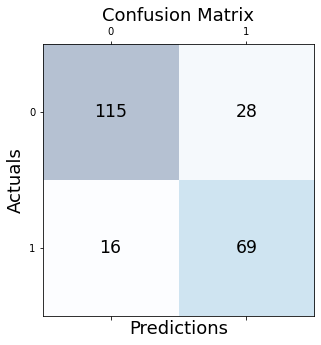

In [273]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

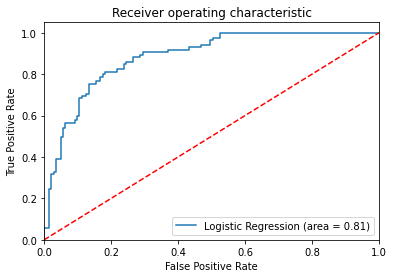

In [82]:
roc_auc_score = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [274]:
#Logistic Regression with Lasso regularization
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [275]:
THRESHOLD = 0.4
preds = np.where(log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [276]:
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.811404
recall,0.811765
precision,0.718750
roc_auc_score,0.762431
f1_score,0.811477


In [277]:
result5 = {'Algorithm Used':'Logistic Regression with Lasso', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result5, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477


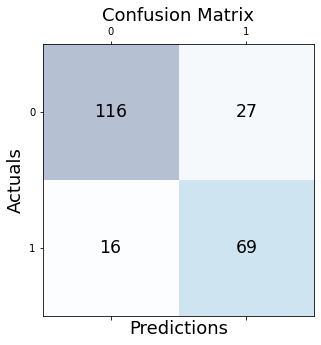

In [89]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

#### Random Forest before tuning and using GridseachCV

In [278]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [279]:
pd.DataFrame(data=[accuracy_score(y_test, pred), recall_score(y_test, pred),
                   precision_score(y_test, pred),f1_score(y_test, pred), roc_auc_score(y_test, pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.785088
recall,0.658824
precision,0.736842
roc_auc_score,0.695652
f1_score,0.759482


In [280]:
result6 = {'Algorithm Used':'Random Forest', 'Accuracy':accuracy_score(y_test, pred), 'Recall':recall_score(y_test, pred), 'Precision':precision_score(y_test, pred),
          'F1-Score':f1_score(y_test, pred), 'AUC':roc_auc_score(y_test, pred)}
results=results.append(result6, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482


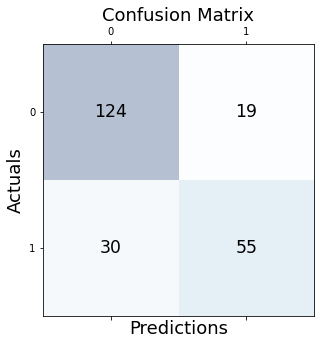

In [98]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

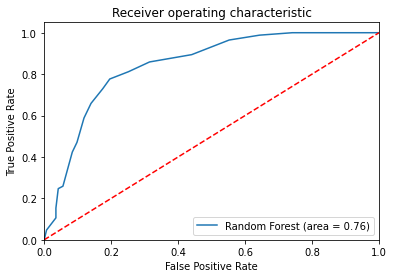

In [281]:
roc_auc_score = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest after tuning and using GridseachCV

In [100]:
grid2={'criterion':['gini', 'entropy'], 'max_features':['auto', 'sqrt', 'log2'], 'class_weight':['balanced', 'balanced_subsample'], 'n_estimators':range(1,50)}
gridsearch=GridSearchCV(rfc,grid2,cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 19}

In [282]:
rfc = RandomForestClassifier(class_weight= 'balanced',
 criterion  = 'entropy',
 max_features= 'auto',
 n_estimators= 19)
rfc.fit(X_train, y_train)
THRESHOLD = 0.45
preds = np.where(rfc.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [285]:
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.780702
recall,0.788235
precision,0.676768
roc_auc_score,0.728261
f1_score,0.782230


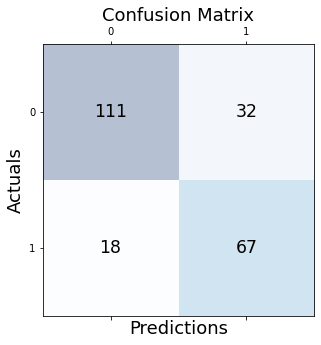

In [286]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

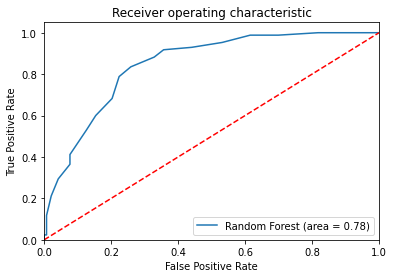

In [287]:
roc_auc_score = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [298]:
result7 = {'Algorithm Used':'Random Forest Tuned', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result7, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896
8,Random Forest Tuned,0.767544,0.764706,0.663265,0.710383,0.766968


## Decision Tree

#### Decision Tree before Tuning and using GridsearchCV

In [299]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
preds = dtree.predict(X_test)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.719298
recall,0.705882
precision,0.606061
roc_auc_score,0.652174
f1_score,0.716578


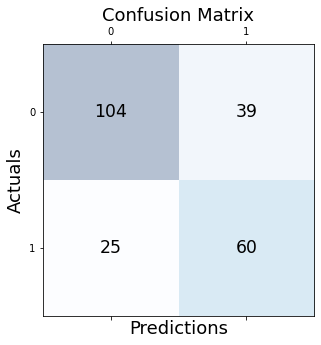

In [300]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

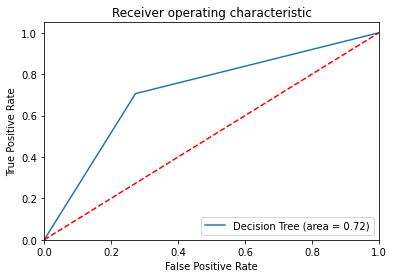

In [301]:
roc_auc_score = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [304]:
result8 = {'Algorithm Used':'Decision Tree', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result8, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896
8,Random Forest Tuned,0.767544,0.764706,0.663265,0.710383,0.766968
9,Decision Tree,0.719298,0.705882,0.606061,0.652174,0.716578


#### Decision Tree after Tuning and using gridsearchCV to find the best parameter

In [131]:
grid3={'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
gridsearch=GridSearchCV(dtree,grid3,cv=5)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [292]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
dtree.fit(X_train, y_train)
THRESHOLD = 0.45
preds = np.where(dtree.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.750000
recall,0.670588
precision,0.662791
roc_auc_score,0.666667
f1_score,0.733896


In [293]:
result9 = {'Algorithm Used':'Decision Tree Tuned', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result9, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896


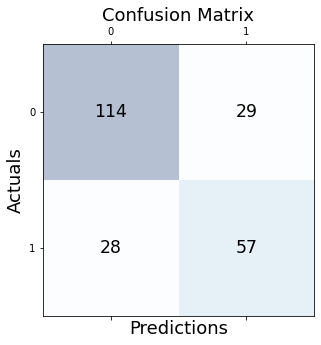

In [294]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

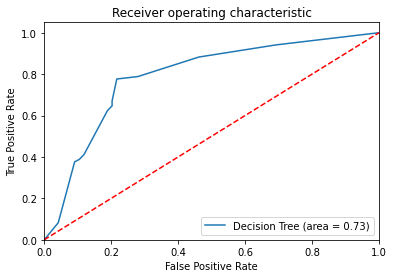

In [295]:
roc_auc_score = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier

In [143]:
grid3={'n_estimators':range(1,30),'max_depth': np.arange(3, 15)}
gridsearch=GridSearchCV(clf,grid3,cv=5)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'max_depth': 3, 'n_estimators': 3}

In [306]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_depth=9, random_state=0)
clf.fit(X_train, y_train)
THRESHOLD = 0.5
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds),f1_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.767544
recall,0.764706
precision,0.663265
roc_auc_score,0.710383
f1_score,0.766968


In [307]:
result10 = {'Algorithm Used':'Gradient Boosting Classifier', 'Accuracy':accuracy_score(y_test, preds), 'Recall':recall_score(y_test, preds), 'Precision':precision_score(y_test, preds),
          'F1-Score':f1_score(y_test, preds), 'AUC':roc_auc_score(y_test, preds)}
results=results.append(result10, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896
8,Random Forest Tuned,0.767544,0.764706,0.663265,0.710383,0.766968
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


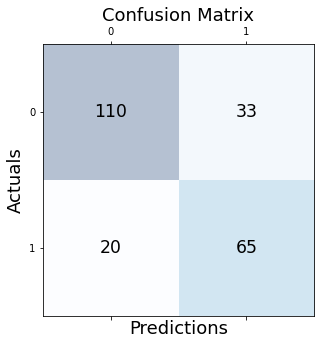

In [308]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

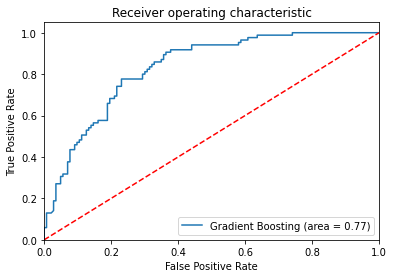

In [309]:
roc_auc_score = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Ada Boost Classifier

#### Ada Boost Classifier before Tuning

In [312]:
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.754386
recall,0.705882
precision,0.659341
roc_auc_score,0.681818
f1_score,0.744550


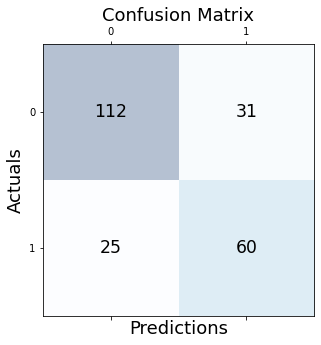

In [313]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

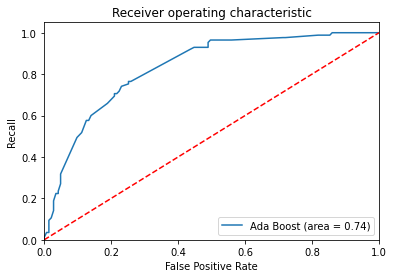

In [314]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, abc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [317]:
result11 = {'Algorithm Used':'Ada Boost Classifier', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result11, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896
8,Random Forest Tuned,0.767544,0.764706,0.663265,0.710383,0.766968
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


#### Ada Boost after Tuning

In [167]:
grid3={'n_estimators':range(1,50), 'learning_rate':range(1,10), 'algorithm':['SAMME', 'SAMME.R']}
gridsearch=GridSearchCV(abc,grid3,cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 11}

In [318]:
abc = AdaBoostClassifier(n_estimators=11,
                         learning_rate=1, algorithm ='SAMME')
model = abc.fit(X_train, y_train)

In [319]:
THRESHOLD = 0.45
y_pred = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.736842
recall,0.835294
precision,0.606838
roc_auc_score,0.702970
f1_score,0.756808


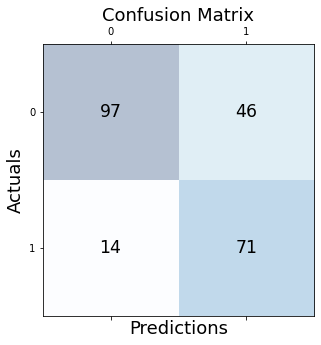

In [320]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

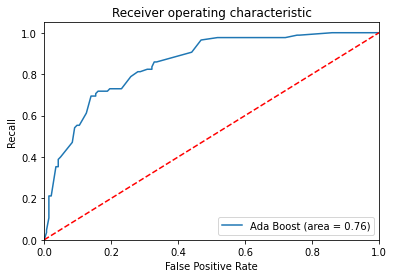

In [321]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, abc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [324]:
result12 = {'Algorithm Used':'Ada Boost Classifier Tuned', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result12, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.658824,0.736842,0.695652,0.759482
6,Decision Tree,0.780702,0.788235,0.676768,0.728261,0.782230
7,Decision Tree Tuned,0.750000,0.670588,0.662791,0.666667,0.733896
8,Random Forest Tuned,0.767544,0.764706,0.663265,0.710383,0.766968
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


## Bagging for Decision Tree

In [325]:
clf = BaggingClassifier(base_estimator = dtree)
model = clf.fit(X_train, y_train)
THRESHOLD = 0.45
y_pred = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.732456
recall,0.752941
precision,0.615385
roc_auc_score,0.677249
f1_score,0.736610


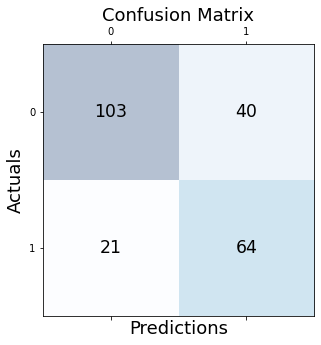

In [326]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

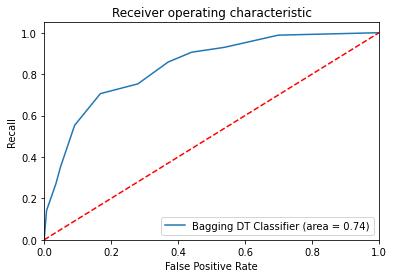

In [327]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging DT Classifier (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [202]:
result13 = {'Algorithm Used':'Bagging for Decision Tree', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result13, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.647059,0.743243,0.691824,0.757096
6,Random Forest Tuned,0.780702,0.776471,0.680412,0.725275,0.779844
7,Decision Tree,0.710526,0.682353,0.597938,0.637363,0.704813
8,Decision Tree Tuned,0.750000,0.600000,0.689189,0.641509,0.719580
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


## Support Vector Machine

#### Support Vector Classifier before tuning

In [208]:
svc = SVC(kernel='linear', C=3, random_state=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.802632
recall,0.647059
precision,0.785714
roc_auc_score,0.709677
f1_score,0.771082


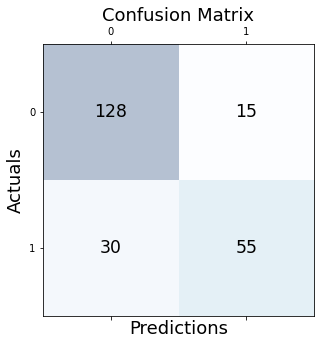

In [209]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [210]:
result14 = {'Algorithm Used':'Support Vector Classifier', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result14, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.647059,0.743243,0.691824,0.757096
6,Random Forest Tuned,0.780702,0.776471,0.680412,0.725275,0.779844
7,Decision Tree,0.710526,0.682353,0.597938,0.637363,0.704813
8,Decision Tree Tuned,0.750000,0.600000,0.689189,0.641509,0.719580
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


#### SVC after Tuning

In [211]:
grid4={'C':range(1,50), 'kernel':['linear','poly', 'rbf'], 'gamma':['scale', 'auto']}
gridsearch=GridSearchCV(svc,grid4,cv=10)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}

In [212]:
svc = SVC(kernel='linear', C=3, gamma ='scale', random_state=1, probability=True )
svc.fit(X_train, y_train)
THRESHOLD = 0.4
y_pred = np.where(svc.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.807018
recall,0.788235
precision,0.720430
roc_auc_score,0.752809
f1_score,0.803209


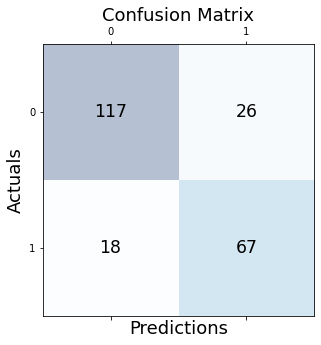

In [213]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

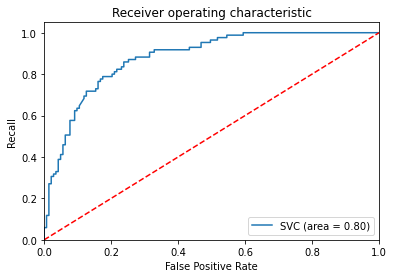

In [217]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [220]:
result15 = {'Algorithm Used':'Support Vector Classifier Tuned', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result15, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.647059,0.743243,0.691824,0.757096
6,Random Forest Tuned,0.780702,0.776471,0.680412,0.725275,0.779844
7,Decision Tree,0.710526,0.682353,0.597938,0.637363,0.704813
8,Decision Tree Tuned,0.750000,0.600000,0.689189,0.641509,0.719580
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


In [225]:
clf = BaggingClassifier(base_estimator = svc)
model = clf.fit(X_train, y_train)
THRESHOLD = 0.4
y_pred = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred),f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.811404
recall,0.800000
precision,0.723404
roc_auc_score,0.759777
f1_score,0.809091


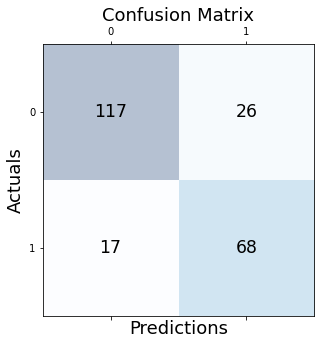

In [226]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

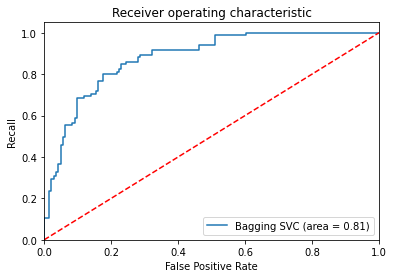

In [227]:
roc_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging SVC (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [230]:
result16 = {'Algorithm Used':'Bagging for Support Vector Classifier', 'Accuracy':accuracy_score(y_test, y_pred), 'Recall':recall_score(y_test, y_pred), 'Precision':precision_score(y_test, y_pred),
          'F1-Score':f1_score(y_test, y_pred), 'AUC':roc_auc_score(y_test, y_pred)}
results=results.append(result16, ignore_index = True)
results

,Algorithm Used,Accuracy,Recall,Precision,F1-Score,AUC
0,K-Nearest Neighbours,0.785088,0.682353,0.725000,0.703030,0.764253
1,K-Nearest Neighbours Tuned,0.789474,0.635294,0.760563,0.692308,0.758206
2,Logistic Regression,0.824561,0.752941,0.771084,0.761905,0.810037
3,Logistic Regression with Ridge Regression,0.807018,0.811765,0.711340,0.758242,0.807980
4,Logistic Regression with Lasso,0.811404,0.811765,0.718750,0.762431,0.811477
5,Random Forest,0.785088,0.647059,0.743243,0.691824,0.757096
6,Random Forest Tuned,0.780702,0.776471,0.680412,0.725275,0.779844
7,Decision Tree,0.710526,0.682353,0.597938,0.637363,0.704813
8,Decision Tree Tuned,0.750000,0.600000,0.689189,0.641509,0.719580
9,Gradient Boosting Classifier,0.767544,0.764706,0.663265,0.710383,0.766968


In [247]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Algorithm Used  16 non-null     object 
 1   Accuracy        16 non-null     float64
 2   Recall          16 non-null     float64
 3   Precision       16 non-null     float64
 4   F1-Score        16 non-null     float64
 5   AUC             16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 896.0+ bytes


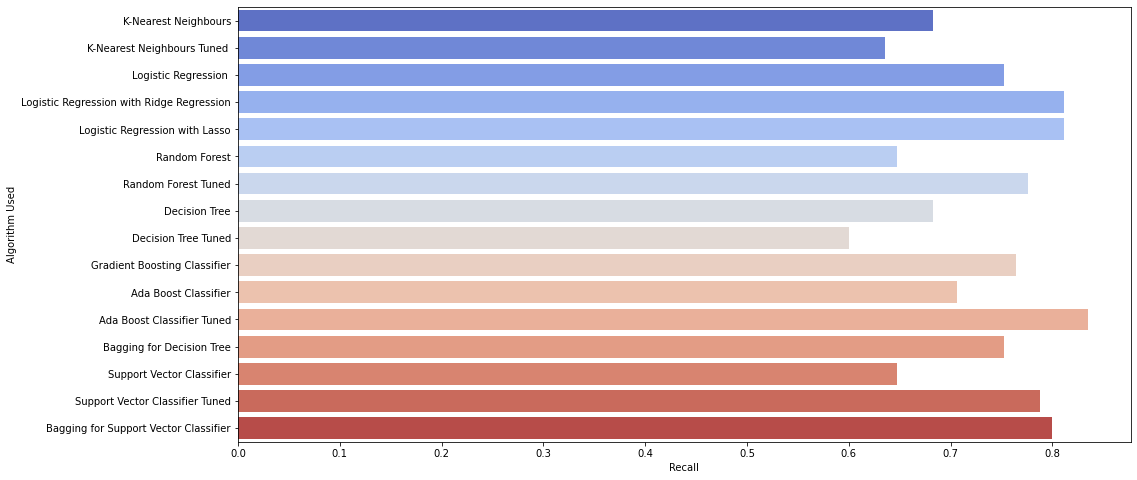

In [251]:
plt.figure(figsize=(16,8))
ax = sns.barplot(y=results['Algorithm Used'], x=results['Recall'], palette='coolwarm') 
plt.show()


##  Appendix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=23)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
THRESHOLD = 0.5
preds = np.where(rfc.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)



In [ ]:
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

In [ ]:
roc_auc_score = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
filename = 'RandomForest.sav'
pickle.dump(rfc, open(filename, 'wb'))